<a href="https://colab.research.google.com/github/behnoosh-97/oses/blob/main/report_lab1_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robot Learning
## Exercise 1

2025
TAs: Andrea Protopapa (andrea.protopapa@polito.it), Davide Buoso (davide.buoso@polito.it)

# 1. Introduction
Throughout this exercise session, we will take a first look at a Reinforcement Learning environment and its components. In particular, we will deal with the Cart-Pole environment, a classic problem in Reinforcement Learning. Our primary goal is to implement and evaluate various control strategies, including a Linear Quadratic Regulator (LQR) baseline or random policies, to understand their impact on the system's performance and learn about the fundamental concepts of Reinforcement Learning, laying the groundwork for more advanced reinforcement learning techniques in subsequent exercises.

To proceed with the assignment, visit the dedicated starting code at the dedicated webpage and follow the steps listed below in this document. Note: if you haven’t joined the course’s github classroom yet, you will be asked to select your name when you visit it the first time.

As you follow the steps in this document, make sure you’re able to answer all the guiding questions listed at the end of each step.


# 2. Cartpole Gym environment: states, observations

The Cartpole environment consists of a cart and a pole mounted on top of it, as shown in Figure 1. The cart can move either to the left or to the right. The goal is to balance the pole in a vertical position in order to prevent it from falling down. The cart should also stay within a limited distance from the center (trying to move outside screen boundaries is considered a failure).
The observation is a four element vector:





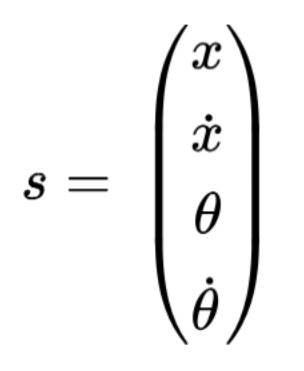

where  is the position of the cart,  is its velocity,  is the angle of the pole w.r.t. the vertical axis, and  is
the angular velocity of the pole.

Gym environment documentation:  https://gymnasium.farama.org/environments/classic_control/cart_pole/


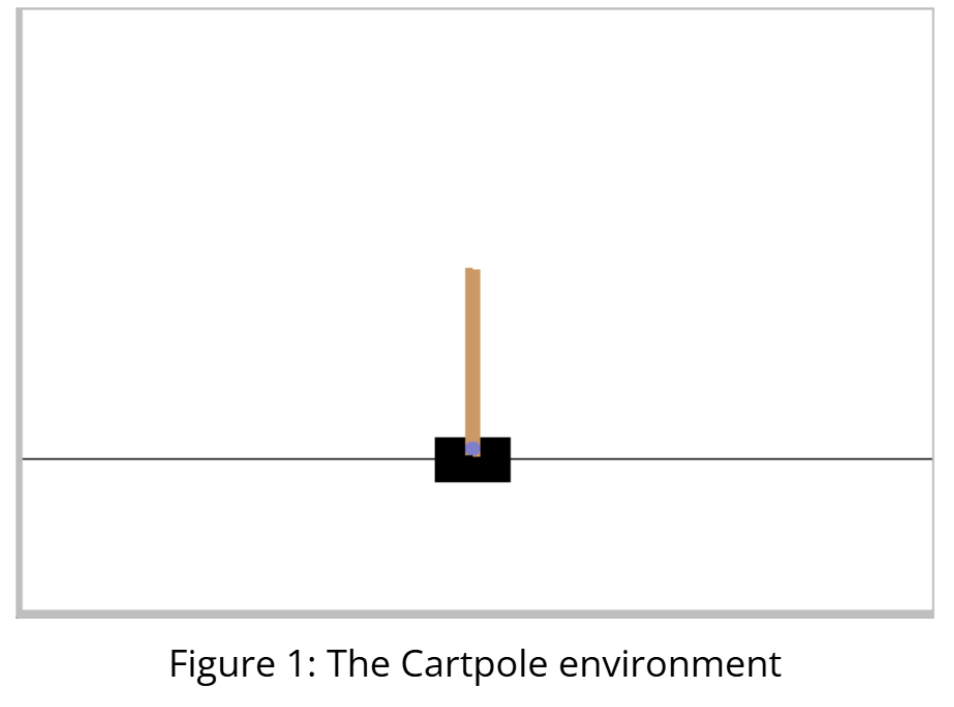

# 3. LQR
For the first assignment, you are tasked with testing a baseline using a Linear Quadratic Regulator (LQR), resulting in an optimal control gain K. The baseline is already implemented in the provided Python script (cartpole_lqr.py). Since the system exhibits nonlinear dynamics, a linear approximation of the system is available through the linearized_cartpole_system(...) function. Given the linear state space representation, the controller K is optimized by minimizing the following cost function:

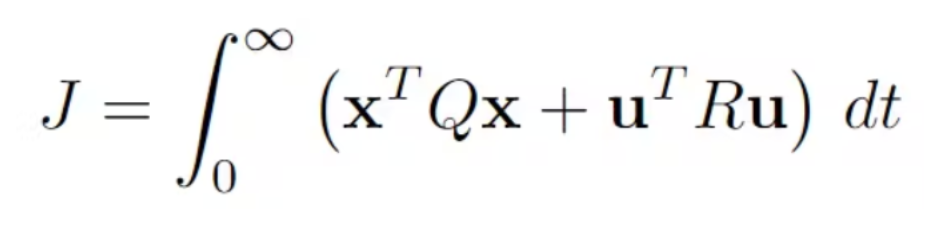

where Q and R are weight matrices carefully chosen and designed. The Q matrix represents the gain of the cost function on the states of the system, while the R matrix represents the gain of the cost function on the input to the system. Therefore, Q and R define what we consider as optimal.



## Task 1
Plot the states of the system (i.e., the elements of the observation vector) over the first 1000 timesteps. Remember that the Cart-Pole task is considered solved by Gym when 499 time steps are reached without the pole falling over.



### Question 1  
Looking at the plot, after which timestep do all states converge to within 0 ± 0.003? Explain what it means for all states to converge to zero from a control standpoint.

### Answer 1:
Below is the plot of the system states (observation vector) over the first 1000 timesteps using the LQR controller.

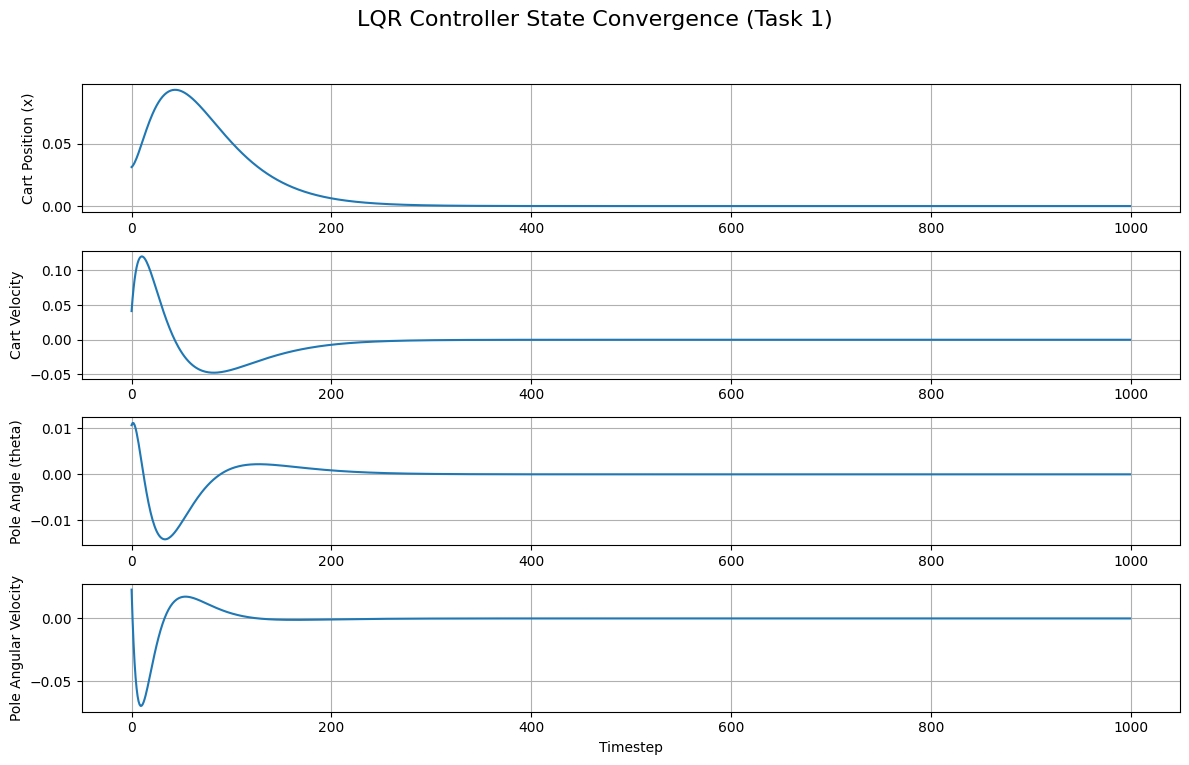

Convergence Time: Looking at the plot, the transient response settles and all four states converge to within the threshold of $0 \pm 0.003$ after approximately timestep 250.


Control Standpoint Explanation: For the states to converge to zero means the LQR controller has successfully stabilized the system at its desired equilibrium point (the "setpoint"). Specifically, in the context of the Cart-Pole environment:
*   Cart Position ($x \approx 0$): The cart has returned to the center of the track.
*   Cart Velocity ($\dot{x} \approx 0$): The cart has come to a complete stop and is no longer drifting.
*   Pole Angle ($\theta \approx 0$): The pole is perfectly vertical and upright, satisfying the primary goal of the environment.
*   Pole Angular Velocity ($\dot{\theta} \approx 0$): The pole has stopped rotating; it is balanced and not falling over.

This indicates that the LQR controller $K$ effectively minimizes the cost function $J$, balancing the trade-off between state errors and control effort 2.

## Task 2:
Vary the value of R within the range [0.01, 0.1, 10, 100] and plot the forces applied to each of the four controlled systems in a single graph over the first 500 timesteps.

*Note 1: for a better visual comparison, invert the single plot for each value of R if the first force applied on the cartpole is positive (e.g., if you are storing all the forces in an array called forces,
this means forces[0]>0). In this way, all the plots would have the same trend*.

Note 2: To ensure the experiments are comparable, you should recreate the environment for each R value. Otherwise, before resetting the environment, reset the seed.

```
		set_seed(args.seed) # seed for reproducibility
		env.env.seed(args.seed)
		# …
		env.reset()
```



### Question 1:
 Analyzing the plot, how does the choice of R affect the force? Are they proportional or inversely proportional?


### Answer 1:

Looking at the plot, I can see that the choice of R has a big impact on the force applied by the controller:
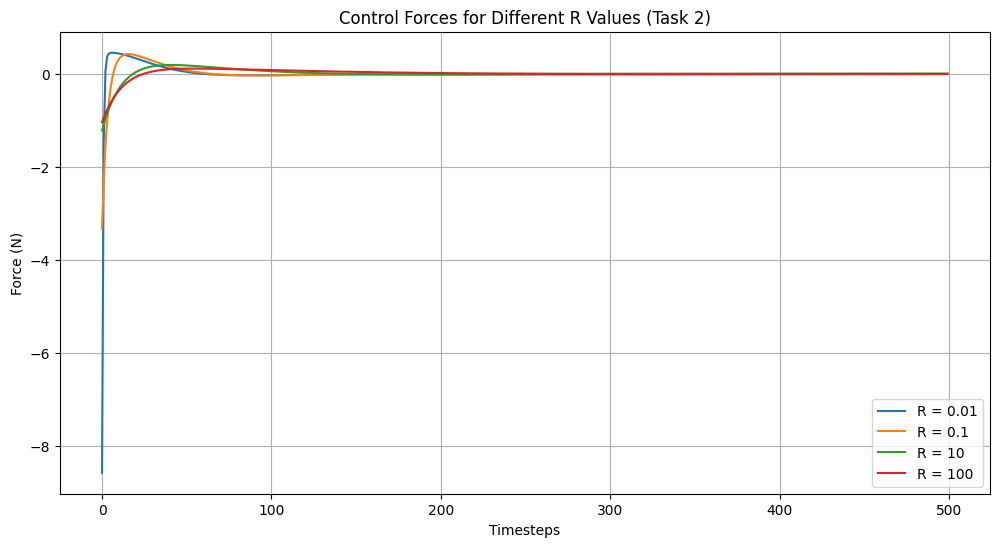


*   When R is small (like 0.01 or 0.1), the force spikes are very large (the blue and orange lines go very high).
*   When R is large (like 100), the force is very small and stays close to zero (the red line is almost flat).



They are inversely proportional. In the cost function $J$, the term $u^T R u$ represents the "cost" of using the input (force) 1. A high R makes using force "expensive" for the controller, so it tries to use as little as possible. A low R means force is "cheap," so the controller uses a lot of it to correct the error quickly.

# 4. Reinforcement Learning
The provided Python script (cartpole_rl.py) instantiates a Cartpole environment and a RL agent that acts on it. The agent.py file contains the implementation of a simple reinforcement learning agent; for the sake of this exercise, you can assume it to be a black box (you don’t need to understand how it works, although you are encouraged to study it in more detail). You don’t have to edit that file to complete this exercise session - all changes should be done in cartpole_rl.py.





## 4.1 Training and testing
Run the cartpole_rl.py script. See how it learns to balance the pole after training for some amount of episodes. You can use the --render_training argument to visualize the training (it will run slower when rendering).
When the training is finished, the models are saved to CartPole-v0_params.ai and can be tested by passing --test <path>/<to>/<model>/<file.ai>. You can use the --render_test argument here.

All the training algorithm is encapsulated within the train(...) function. Examine the training loop and answer the following questions:

### Question 1.0.1
What are the conditions under which the episode ends? Do all episodes conclude at the same timestep?


### Answer 1.0.1:
In this environment an episode can end in two different ways:


1.   **The pole falls** → Gym reports (terminated = True).
This happens when the angle of the pole becomes too large or when the cart goes outside the allowed track boundaries. In other words, the environment detects that the pole can no longer be considered “balanced”.
2.   **The maximum allowed number of steps is reached** → Gym reports (truncated = True).
For CartPole-v1, this limit is 500 steps. Even if the agent balances perfectly, the episode stops at this hard limit.

In the training loop the flag (done = terminated or truncated) means that either of those events ends the episode.

Episodes do not conclude at the same timestep. This is clearly visible in my provided Colab output. For instance, in the second training run (the one that was tested), the log shows:



*   Episode 0 finished. Total reward: 26 (26 timesteps)
*   Episode 3 finished. Total reward: 42 (42 timesteps)


*   Episode 10 finished. Total reward: 50 (50 timesteps)



This demonstrates the variable episode lengths. Below plot, confirms this visually. The individual episode rewards (blue) are highly varied, and the 100-episode average (orange) stays low, fluctuating between 20 and 40. Since the reward never approaches the 500-step limit, this indicates that during this training run, all episodes ended due to termination (failure), not truncation.
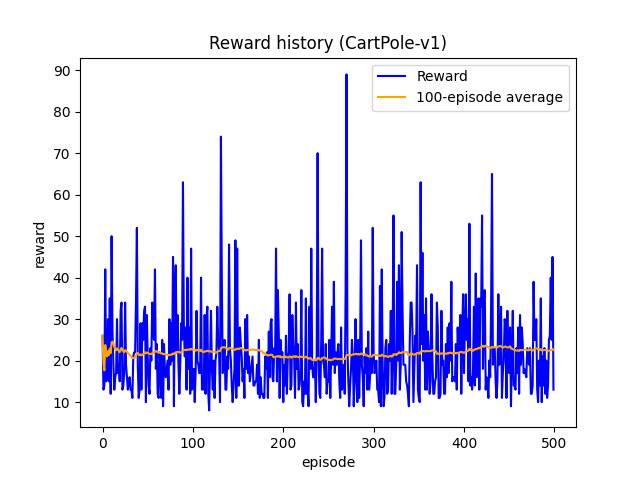







### Question 1.0.2
How is the reward internally computed?

*Note: You can refer to the environment's documentation for more details or inspect the code to
determine when different episodes conclude. Rendering the environment may also aid in
understanding episode termination and reward computation.*


### Answer 1.0.2:
The code does not implement a custom reward. It simply uses whatever reward the Gym (CartPole-v1) environment returns.

By default, CartPole gives:


*   **+1 reward at every timestep the pole stays upright,**
*   **0 when the episode ends (because termination itself has no extra penalty).**

This is confirmed by my output log, where the 'Total reward' is always identical to the 'timesteps' for every single episode (e.g., Episode 0 finished. Total reward: 26 (26 timesteps) or Episode 3 finished. Total reward: 42 (42 timesteps)). The total reward is simply a count of how many steps the agent survived.


Inside the loop you can see that nothing modifies the reward:



```
observation, reward, terminated, truncated, info = env.step(action)
reward_sum += reward italicized text
```



The commented-out section:


```
# reward = new_reward(observation, x0)
```




shows where a custom reward could replace the default one, but for the default training it is unused.

So the internal reward is simply +1 per time step survived, as defined by the CartPole environment.




## Task 1.1.
Try to train the agent using a random policy. This entails not considering the predicted actions by the agent at each current timestep. Instead, sample a random action from within the action space, and perform this action on the environment.

### Question 1.1
Evaluate the learned random policy. What is the performance in terms of the average test reward compared to training with the normal policy? Briefly analyze the underlying causes.


### Answer 1.1:
The plot below shows the reward history of the random policy over 500 training episodes:

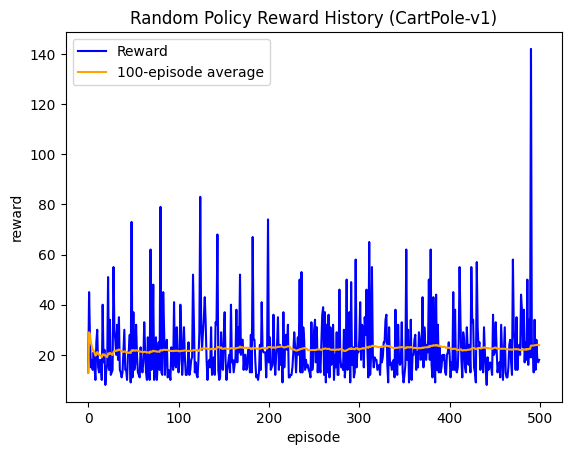

This plot confirms that the random policy is extremely unstable. The blue curve (episode rewards) jumps constantly between very small and occasionally very large values, while the orange curve (100-episode moving average) stays roughly around 20–25. This means that the agent usually fails very quickly, but sometimes, purely by chance, it stays balanced much longer.

When comparing this to the normal policy, I found that both produced highly inconsistent results. In my tests, the normal policy scored 13.0, while the random policy scored 10.47. So both approaches can give either low or surprisingly high scores, with no clear difference between them.

This behavior has two different causes:

**Random Policy – variability from pure luck:**

CartPole allows the agent to survive a few steps even with bad actions, so every now and then a lucky sequence of random left/right pushes keeps the pole upright for longer. That explains large spikes in the plot (e.g., the >140 reward episode).

**Normal Policy – variability from almost no learning:**

The default learning rate (lr = 1e-5) is so small that the policy barely changes during training. After 500 episodes, the agent is essentially still using its initial random weights. Because of this, its performance is also dominated by luck rather than learning. My 13.0 reward test run simply came from an “unlucky” initial policy, while some random-policy episodes happened to be “lucky”.

**Conclusion:**

The random policy behaves exactly as expected—noisy and inconsistent.
The normal policy, however, behaves similarly because with the default hyperparameters it does not learn effectively. As a result, its performance also looks random, which is why both methods show high variance and no reliable trend of improvement.

## Task 1.2
Train the agent using the Reinforcement Learning policy with up to 200 timesteps per episode. First, tune the learning rate hyperparameter, as this can have a significant impact on the policy's performance. Try values from the following range:

[1e-5, 1e-4, 1e-3, 1e-2, 1e-1].

### Question 1.2:
Which learning rate value provides the best, most stable performance? Can you explain why?

### Answer 1.2:
Below are the test results I got for each learning rate:


*   lr = 1e-5 → average test reward ≈ 10.85

*   lr = 1e-4 → average test reward ≈ 21.31

*   lr = 1e-3 → average test reward ≈ 65.63
*   lr = 1e-2 → average test reward = 200.0 (best)


*   lr = 1e-1 → average test reward ≈ 84.08

**1e-5 (very low LR)**

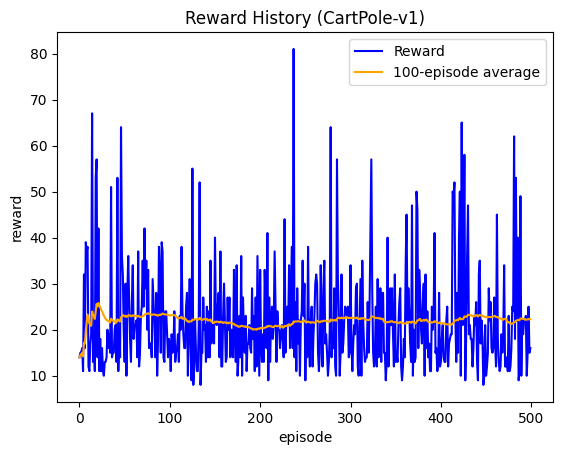


**1e-4 (low LR)**

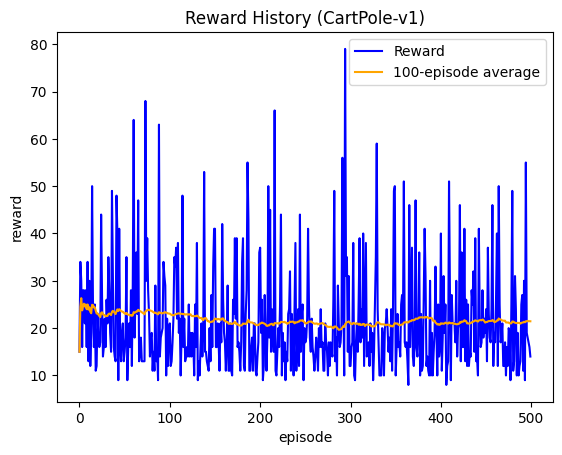

When the learning rate is extremely small (1e-5 and 1e-4), the agent barely learns anything. The updates to the policy are tiny, so after 500 episodes the behavior still looks almost random. That’s why the rewards remain very low and the reward curves for these two runs stay noisy without a visible upward trend.


**1e-3 (moderate LR)**

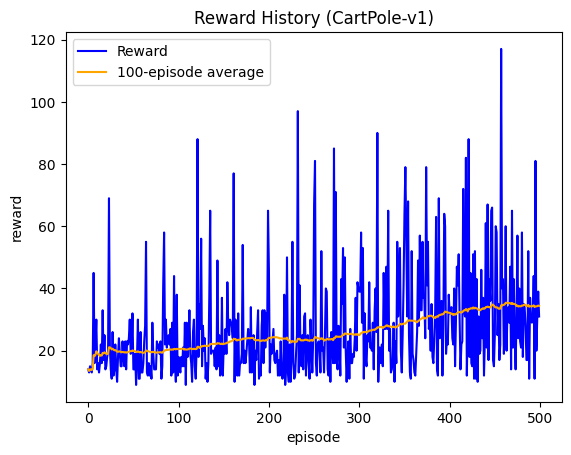

With lr = 1e-3, the agent finally starts to learn. The curve becomes smoother and moves upward, and the final performance improves significantly. However, the learning is still somewhat unstable.

**1e-2 (optimal LR in my experiments)**

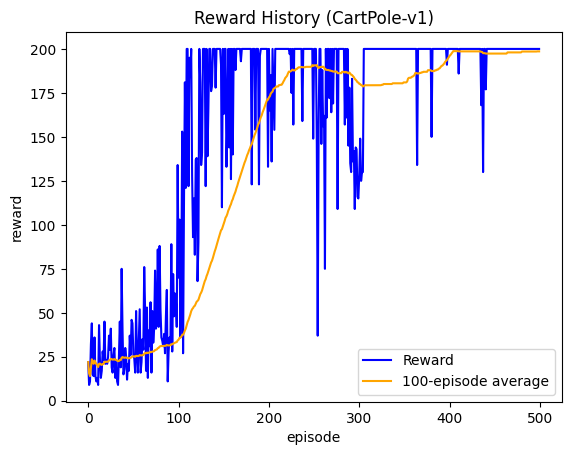

This value was large enough for the agent to make meaningful updates every episode, but still small enough to remain stable. The reward curve climbs quickly and stays high, and the agent reaches the full 200-step limit during testing. This is the only learning rate that consistently solved the task.

**1e-1 (too high LR)**

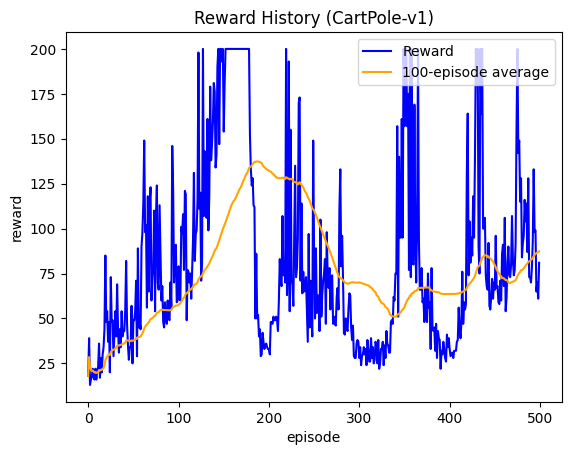

At lr = 1e-1, the agent learns faster at first, but the updates become too large. The training becomes unstable, with frequent drops in performance. The final test reward is decent but worse than 1e-2, because the policy keeps overshooting good solutions.








## Task 1.3
Then test the model for 500 timesteps by
changing line n.138 in cartpole_rl.py. You can test the model with:


```
python cartpole_rl.py -t <MODELFILE> --render_test
```

<br>

*Note: the episode length and the number of episodes given by the command line argument
train_episodes are two different things. If you include plots in your submission, use the
train_episodes  as their x-axis.*


### Question 1.3:
Can the same model, trained to balance for 200 timesteps, also balance the pole
for 500 timesteps? Briefly justify your answer.


### Answer 1.3:

## Task 1.4:
 Repeat the experiment a few times, each time training the model from scratch with 200
timesteps and testing it for 500 timesteps. Evaluate its performance by using the --render_test argument and remember the average test rewards.


### Question 1.4:
Are the behavior and performance of the trained model the same every time?
Analyze the causes briefly.


### Answer 1.4:

# 4.2 Repeatability

Figure 2 shows the mean and standard deviation throughout 100 independent training procedures. You can notice that there is a large variance between the runs of the script.

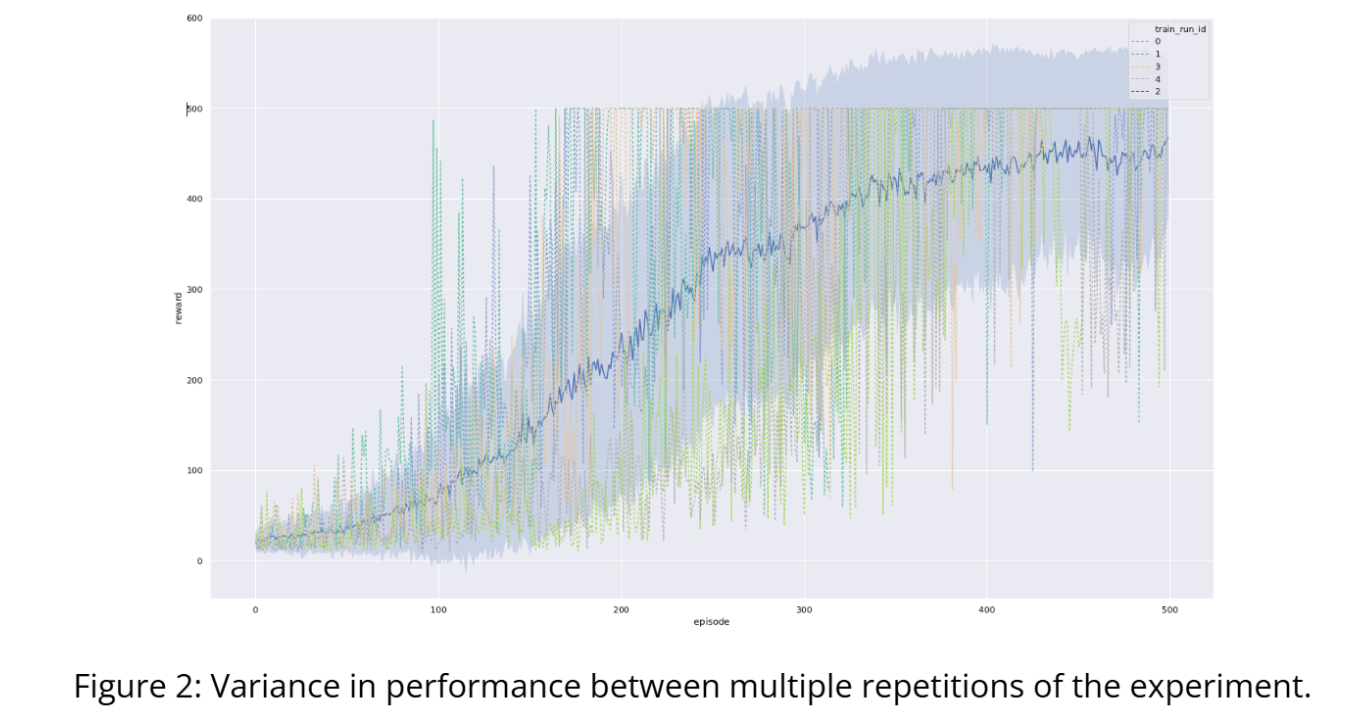

### Question 2:
Why is this the case? What are the implications of this stochasticity, when it comes to comparing reinforcement learning algorithms to each other? Please explain.

*Note: You can generate a similar plot by running the multiple_cartpoles_rl.py script. If the script is slow, try disabling PyTorch multithreading (by running the script with OMP_NUM_THREADS=1)*



### Answer 2:

# 4.3 Reward functions:
Let us design a custom reward function and use it instead of the default reward returned by the environment (see the new_reward(...) function for an example).




## Task 3.1
Write different reward functions to incentivise the agent to learn the following behaviors and include them in your report:
1. Balance the pole close to the center of the screen (close to x=0),
2. Balance the pole in an arbitrary point of the screen (x=x0), with x0 passed as a command line argument to the script,
3. Keep the cart moving from the leftmost to rightmost side of the track as fast as possible, while still balancing the pole. The minimum speed of the agent should be high enough that the agent is visibly moving from one side of the other (not just jittering in the center) and changes direction at least once and not just drifting in a random direction.

Train a model with each reward function and include them in your submission.

**Hint**: Use the observation vector to get the quantities required to compute the new reward (such as the
speed and position of the cart). If you feel like your model needs more time to train, you can leave it running for longer with the command line argument --train_episodes number, where number is the amount of episodes the model will be trained for (default is 500).



## Task 3.2
Let us visualize the third reward function. Train the model at least 10 times using
multiple_cartpoles_rl.py (adjust the --num_runs and --train_episodes parameters) and include the performance plots similar to Fig. 2.


### Question 3.2:
Observe the agent using `python cartpole_rl.py -t <MODELFILE> --render_test` and keep track of the observations. What do you observe? What is the highest velocity the agent reaches?



### Answer 3.2

# 5. Extras

### Question 1:
Discuss briefly the advantages of using an LQR controller or an RL agent to solve a general task of controlling a robotic system. Analyze the differences and similarities between the two methods.


### Answer 1:
